# Model Selection & Validation 

With the data cleaned, here we try different models and compare the results.


In [14]:
# import libraries
library(corrplot)
library(ggplot2)
library(dplyr)
#library(tidyverse)

In [15]:
#import data as data frame
df <- read.csv("./data/train_cleanednewest.csv")

#get description of data

#head(df)
#summary(df)
str(df)

'data.frame':	1456 obs. of  97 variables:
 $ X                 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ MSSubClass        : int  60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning          : Factor w/ 5 levels "C (all)","FV",..: 4 4 4 4 4 4 4 4 5 4 ...
 $ LotFrontage       : num  65 80 68 60 84 ...
 $ LotArea           : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ Street            : Factor w/ 2 levels "Grvl","Pave": 2 2 2 2 2 2 2 2 2 2 ...
 $ Alley             : Factor w/ 3 levels "Grvl","None",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ LotShape          : Factor w/ 4 levels "IR1","IR2","IR3",..: 4 4 1 1 1 1 4 1 4 4 ...
 $ LandContour       : Factor w/ 4 levels "Bnk","HLS","Low",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ LotConfig         : Factor w/ 5 levels "Corner","CulDSac",..: 5 3 5 1 3 5 5 1 5 1 ...
 $ LandSlope         : Factor w/ 3 levels "Gtl","Mod","Sev": 1 1 1 1 1 1 1 1 1 1 ...
 $ Neighborhood      : Factor w/ 25 levels "Blmngtn","Blueste",..: 6 25 6 7 14 12 21 17 18 4 ...
 $ Conditio

Define y in the models

1st adjustment for Price: Price = SalePrice - MiscVal 

MiscVal is the price of an additional features (a tennis court, e,g) that can not be categorized in all the rest variables (e.g Nb of bathroom, Nb of floors, etc.). It is added directly to the house price.
Therefore, to keep the linearity, we here substract this additional price directly from the house price.


Models:
                                                
linear:                     Price  ~ X                                                   
log:                        log(Price)  ~ X                                              
Cox-Box:                Cox-Box(Price, lambda) ~ X                         
Price/House_Area:   Price/House_Area  ~ X                                  

After model selection, we reduce the variables by forward & backword features selection, then cross-validation.



In [16]:
# ********************** 1st Price = SalePrice - MiscVal  *****************************

In [17]:
df$Price = df$SalePrice - df$MiscVal
# Then in the futur modelling, the variable "MiscVal" and "MiscFeature" will no longer be included in the model.

In [18]:
# ******************** MODEL BUILDING **************************************

In [19]:
# ****************************  1st  - To decide whether use the numerical nominal variables or not **********************************

# Simplest linear mocel with original quality variables: excellent - good- average - fair - poor

ModelWithOriginalQual <- lm(Price ~ . -X -MiscFeature -MiscVal -SalePrice -ExterQual  -ExterCond  -GarageQual  -GarageCond  -FireplaceQu  -KitchenQual  -HeatingQC  -BsmtQual -BsmtExposure -BsmtFinType1 -BsmtFinType2 -Functional - GarageFinish -Fence, data=df)
summary(ModelWithOriginalQual)
# adjusted R square: 0.9301

yfitOrigin <- predict(ModelWithOriginalQual)
rsqLinearOrigin <- cor(df$Price, yfitOrigin)^2
rsqLinearOrigin
# 0.9419

# Simplest linear mocel with transformed quality variables: 4 - 3 - 2 - 1 - 0
ModelWithNewQual <- lm(Price ~ . -X -MiscFeature -MiscVal -SalePrice -ExterQualOrigin  -ExterCondOrigin  -GarageQualOrigin  -GarageCondOrigin  -FireplaceQuOrigin  -KitchenQualOrigin  -HeatingQCOrigin  -BsmtQualOrigin -BsmtExposureOrigin -BsmtFinType1Origin -BsmtFinType2Origin -FunctionalOrigin -GarageFinishOrigin -FenceOrigin, data=df)
summary(ModelWithNewQual)
# adjusted R square: 0.9190

yfitNew <- predict(ModelWithNewQual)
rsqLinearNew <- cor(df$Price, yfitNew)^2
rsqLinearNew
# 0.9303



Call:
lm(formula = Price ~ . - X - MiscFeature - MiscVal - SalePrice - 
    ExterQual - ExterCond - GarageQual - GarageCond - FireplaceQu - 
    KitchenQual - HeatingQC - BsmtQual - BsmtExposure - BsmtFinType1 - 
    BsmtFinType2 - Functional - GarageFinish - Fence, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-136682   -8832      37    9325  135711 

Coefficients: (10 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -1.614e+05  9.434e+05  -0.171 0.864168    
MSSubClass             -3.729e+01  7.262e+01  -0.514 0.607676    
MSZoningFV              3.274e+04  1.071e+04   3.057 0.002288 ** 
MSZoningRH              2.275e+04  1.065e+04   2.136 0.032894 *  
MSZoningRL              2.478e+04  9.110e+03   2.721 0.006611 ** 
MSZoningRM              1.911e+04  8.530e+03   2.241 0.025234 *  
LotFrontage             1.103e+01  3.964e+01   0.278 0.780917    
LotArea                 9.045e-01  1.050e-

[1] 0.9418944


Call:
lm(formula = Price ~ . - X - MiscFeature - MiscVal - SalePrice - 
    ExterQualOrigin - ExterCondOrigin - GarageQualOrigin - GarageCondOrigin - 
    FireplaceQuOrigin - KitchenQualOrigin - HeatingQCOrigin - 
    BsmtQualOrigin - BsmtExposureOrigin - BsmtFinType1Origin - 
    BsmtFinType2Origin - FunctionalOrigin - GarageFinishOrigin - 
    FenceOrigin, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-140501  -11151       0   10764  149929 

Coefficients: (4 not defined because of singularities)
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -9.559e+05  9.838e+05  -0.972 0.331428    
MSSubClass           -8.946e+01  7.579e+01  -1.180 0.238062    
MSZoningFV            3.119e+04  1.131e+04   2.757 0.005925 ** 
MSZoningRH            2.758e+04  1.131e+04   2.439 0.014848 *  
MSZoningRL            2.498e+04  9.577e+03   2.608 0.009216 ** 
MSZoningRM            2.016e+04  8.992e+03   2.242 0.025133 *  
LotFrontage           4.924e+

[1] 0.9303319

In [20]:
# ********************* Conclusion:  we accept most of the transformed nominal variables, and keep 3 original***************************
# by comparing the p value of  different versions of the same variable to decide whether accept new variables or not
# we use the new ones, except Garagefinish, BsmtFinType1, BsmtFinType2, we keep the original
# so the variables to put in the variables will be:

# Simplest linear mocel with accepted transformed quality variables: 
ModelWithNewQual <- lm(Price ~ . -X -MiscFeature -MiscVal -SalePrice -ExterQualOrigin  -ExterCondOrigin  -GarageQualOrigin  -GarageCond  -FireplaceQuOrigin  -KitchenQualOrigin  -HeatingQCOrigin  -BsmtQualOrigin -BsmtExposureOrigin -BsmtFinType1 -BsmtFinType2 -FunctionalOrigin -GarageFinishOrigin -FenceOrigin, data=df)
summary(ModelWithNewQual)
# 0.9196

yfitNew <- predict(ModelWithNewQual)
rsqLinearNew <- cor(df$Price, yfitNew)^2
rsqLinearNew
# 0.9315


Call:
lm(formula = Price ~ . - X - MiscFeature - MiscVal - SalePrice - 
    ExterQualOrigin - ExterCondOrigin - GarageQualOrigin - GarageCond - 
    FireplaceQuOrigin - KitchenQualOrigin - HeatingQCOrigin - 
    BsmtQualOrigin - BsmtExposureOrigin - BsmtFinType1 - BsmtFinType2 - 
    FunctionalOrigin - GarageFinishOrigin - FenceOrigin, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-138513  -10881      16   10635  152184 

Coefficients: (6 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -7.415e+05  9.860e+05  -0.752 0.452186    
MSSubClass             -7.438e+01  7.579e+01  -0.981 0.326541    
MSZoningFV              3.075e+04  1.132e+04   2.718 0.006667 ** 
MSZoningRH              2.769e+04  1.132e+04   2.447 0.014553 *  
MSZoningRL              2.448e+04  9.597e+03   2.551 0.010858 *  
MSZoningRM              1.951e+04  9.013e+03   2.164 0.030627 *  
LotFrontage             1.030e+01  4.1

[1] 0.9314747


Call:
lm(formula = Pricebc ~ . - X - Price - MiscFeature - MiscVal - 
    SalePrice - ExterQualOrigin - ExterCondOrigin - GarageQualOrigin - 
    GarageCond - FireplaceQuOrigin - KitchenQualOrigin - HeatingQCOrigin - 
    BsmtQualOrigin - BsmtExposureOrigin - BsmtFinType1 - BsmtFinType2 - 
    FunctionalOrigin - GarageFinishOrigin - FenceOrigin, data = df)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0202140 -0.0012362  0.0000738  0.0015131  0.0145724 

Coefficients: (6 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             3.169e+00  1.369e-01  23.152  < 2e-16 ***
MSSubClass             -7.287e-06  1.052e-05  -0.693 0.488716    
MSZoningFV              1.492e-02  1.571e-03   9.498  < 2e-16 ***
MSZoningRH              1.502e-02  1.571e-03   9.561  < 2e-16 ***
MSZoningRL              1.447e-02  1.333e-03  10.858  < 2e-16 ***
MSZoningRM              1.342e-02  1.251e-03  10.727  < 2e-16 **

[1] 0.9465984

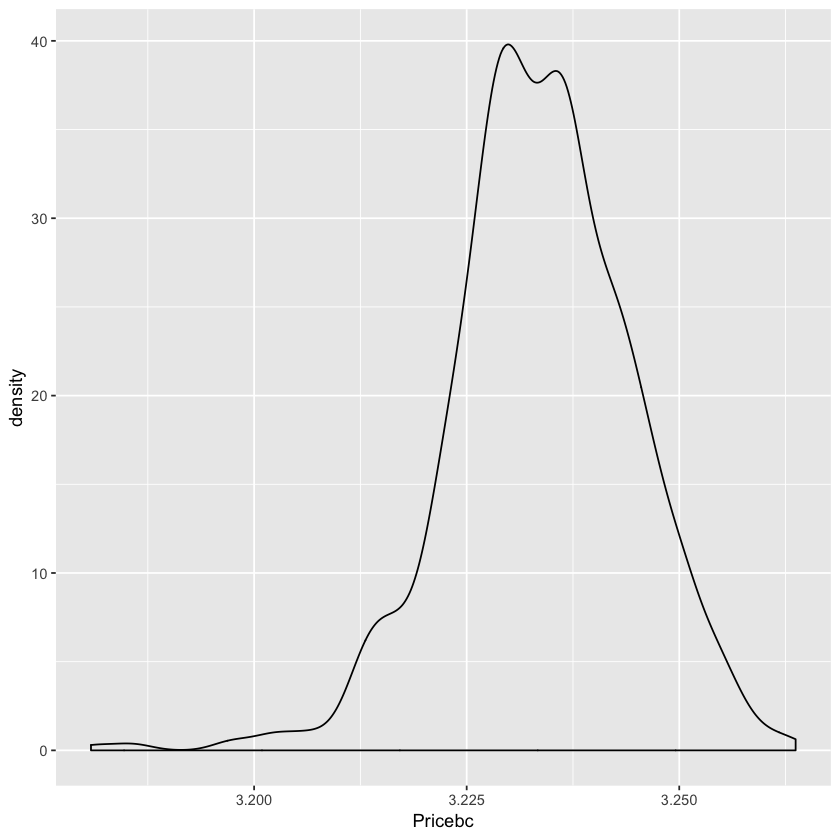

In [21]:
# ******************************** Box Cox **********************************
# Library Forecast
library(forecast)

# Get the optimal lambda to modify the shape of the SalePrice to a normal distribution
lambda = BoxCox.lambda(df$Price, method = c("guerrero", "loglik"), lower = -1, upper = 2)

# Transform SalePrice using the lambda previously calculated
df$Pricebc = BoxCox(df$Price, lambda)


# Visualize the SalePrice transformation
ggplot(df, aes(x = Pricebc)) + 
  geom_density(trim = TRUE)

# Fit a linear model using the adjusted SalePricebc
model_bc <- lm(Pricebc ~ . -X - Price -MiscFeature -MiscVal -SalePrice -ExterQualOrigin  -ExterCondOrigin  -GarageQualOrigin  -GarageCond  -FireplaceQuOrigin  -KitchenQualOrigin  -HeatingQCOrigin  -BsmtQualOrigin -BsmtExposureOrigin -BsmtFinType1 -BsmtFinType2 -FunctionalOrigin -GarageFinishOrigin -FenceOrigin, data = df)
summary(model_bc)
# *********  adjusted R square 0.9211  *************

# Get the predicted values for SalePrice (transformed) for the Box-Cox model
yfitbc <- predict(model_bc)

# Transform the predicted SalePrice to compare it to the simple linear model
yfitbc <- InvBoxCox(yfitbc, lambda, biasadj = FALSE, fvar = NULL)
rsqbc <- cor(df$Price, yfitbc)^2
rsqbc
# 0.9466


Call:
lm(formula = PriceLog ~ . - X - Pricebc - Price - MiscFeature - 
    MiscVal - SalePrice - ExterQualOrigin - ExterCondOrigin - 
    GarageQualOrigin - GarageCond - FireplaceQuOrigin - KitchenQualOrigin - 
    HeatingQCOrigin - BsmtQualOrigin - BsmtExposureOrigin - BsmtFinType1 - 
    BsmtFinType2 - FunctionalOrigin - GarageFinishOrigin - FenceOrigin, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67008 -0.04547  0.00112  0.05130  0.45903 

Coefficients: (6 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             8.782e+00  4.574e+00   1.920 0.055079 .  
MSSubClass             -2.843e-04  3.516e-04  -0.809 0.418917    
MSZoningFV              4.247e-01  5.249e-02   8.091 1.40e-15 ***
MSZoningRH              4.226e-01  5.249e-02   8.051 1.91e-15 ***
MSZoningRL              4.062e-01  4.452e-02   9.123  < 2e-16 ***
MSZoningRM              3.656e-01  4.181e-02   8.743  < 2e-16 ***
Lo

[1] 0.9527999

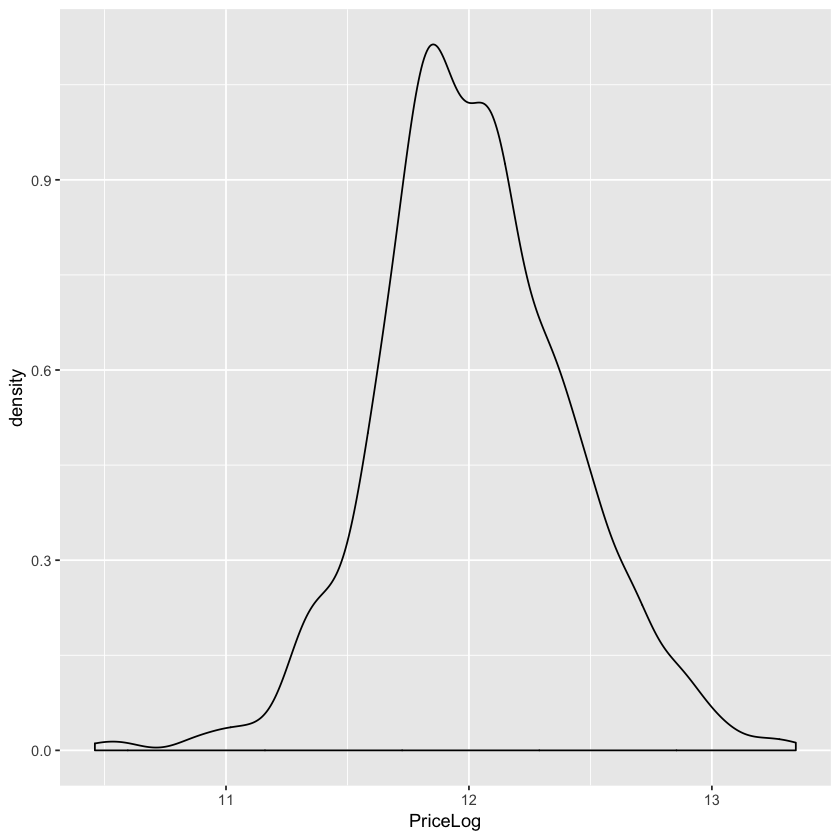

In [22]:
# ************************************ Log *******************************

df$PriceLog = log(df$Price)

ggplot(df, aes(x = PriceLog)) + 
  geom_density(trim = TRUE)

model_log <- lm(PriceLog ~ . -X - Pricebc- Price -MiscFeature -MiscVal -SalePrice -ExterQualOrigin  -ExterCondOrigin  -GarageQualOrigin  -GarageCond  -FireplaceQuOrigin  -KitchenQualOrigin  -HeatingQCOrigin  -BsmtQualOrigin -BsmtExposureOrigin -BsmtFinType1 -BsmtFinType2 -FunctionalOrigin -GarageFinishOrigin -FenceOrigin, data = df)
summary(model_log)

# adjusted R square: 0.9352
# PriceLog now very normal distributed 

yfitlog <- predict(model_log)

# Transform the predicted SalePrice to compare it to the simple linear model
yfitlog <- exp(yfitlog)
rsqlog <- cor(df$Price, yfitlog)^2
rsqlog
# 0.9528



Call:
lm(formula = PricePerSquare1 ~ . - X - PriceLog - Pricebc - Price - 
    MiscFeature - MiscVal - SalePrice - ExterQualOrigin - ExterCondOrigin - 
    GarageQualOrigin - GarageCond - FireplaceQuOrigin - KitchenQualOrigin - 
    HeatingQCOrigin - BsmtQualOrigin - BsmtExposureOrigin - BsmtFinType1 - 
    BsmtFinType2 - FunctionalOrigin - GarageFinishOrigin - FenceOrigin, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.1396 -0.8487  0.0117  0.8829  7.9416 

Coefficients: (6 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -4.852e+01  7.207e+01  -0.673 0.500951    
MSSubClass              1.244e-02  5.540e-03   2.246 0.024864 *  
MSZoningFV              3.589e+00  8.271e-01   4.339 1.55e-05 ***
MSZoningRH              3.181e+00  8.272e-01   3.845 0.000127 ***
MSZoningRL              1.854e+00  7.016e-01   2.643 0.008333 ** 
MSZoningRM              2.513e+00  6.589e-01   3.814 0.00014

[1] 0.5587286

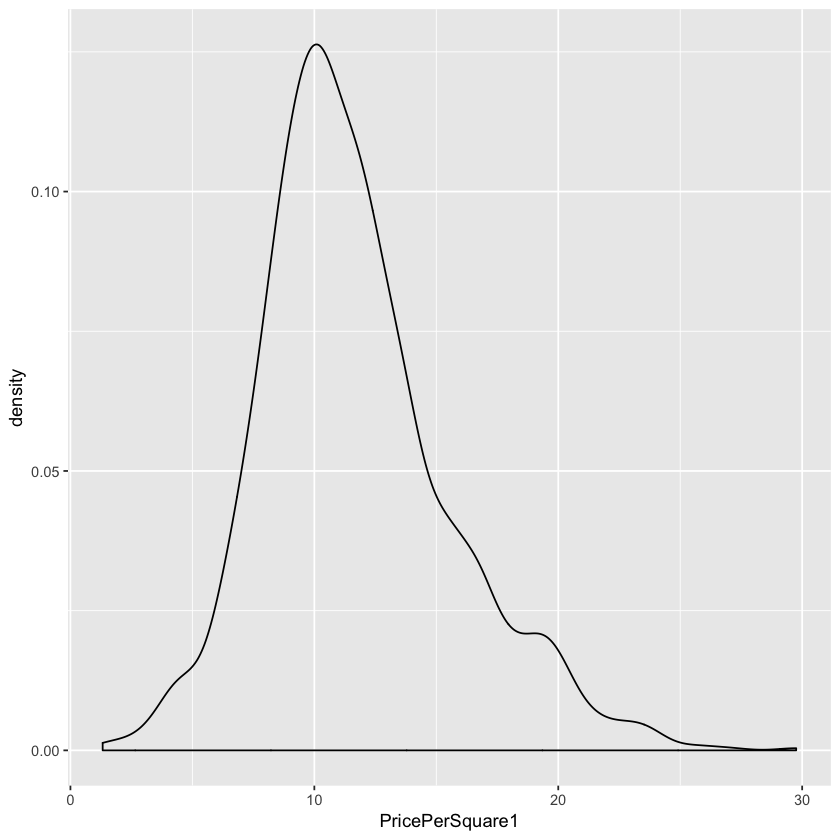

In [23]:
# *********************************** Per Square 1 using total area. (calculation of total area see former part notebook)*************************

df$PricePerSquare1 = df$Price / df$TotalArea

ggplot(df, aes(x = PricePerSquare1)) + 
  geom_density(trim = TRUE)

model_persquare1 <- lm(PricePerSquare1 ~ . -X -PriceLog - Pricebc- Price -MiscFeature -MiscVal -SalePrice -ExterQualOrigin  -ExterCondOrigin  -GarageQualOrigin  -GarageCond  -FireplaceQuOrigin  -KitchenQualOrigin  -HeatingQCOrigin  -BsmtQualOrigin -BsmtExposureOrigin -BsmtFinType1 -BsmtFinType2 -FunctionalOrigin -GarageFinishOrigin -FenceOrigin, data = df)
summary(model_persquare1)

# adjusted R square: 0.8322
# lightly skewed

yfitpsq <- predict(model_persquare1)

# Transform the predicted SalePrice to compare it to the simple linear model
yfitpsq <- yfitpsq*df$TotalArea
rsqpsq <- cor(df$Price, yfitpsq)^2
rsqpsq
# 0.5587



Call:
lm(formula = PricePerSquare2 ~ . - X - PricePerSquare1 - PriceLog - 
    Pricebc - Price - MiscFeature - MiscVal - SalePrice - ExterQualOrigin - 
    ExterCondOrigin - GarageQualOrigin - GarageCond - FireplaceQuOrigin - 
    KitchenQualOrigin - HeatingQCOrigin - BsmtQualOrigin - BsmtExposureOrigin - 
    BsmtFinType1 - BsmtFinType2 - FunctionalOrigin - GarageFinishOrigin - 
    FenceOrigin, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-74.534  -6.791  -0.006   6.651  81.055 

Coefficients: (6 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -2.203e+02  5.831e+02  -0.378 0.705579    
MSSubClass             -7.073e-02  4.481e-02  -1.578 0.114755    
MSZoningFV              2.684e+01  6.691e+00   4.011 6.40e-05 ***
MSZoningRH              2.555e+01  6.692e+00   3.818 0.000141 ***
MSZoningRL              2.534e+01  5.675e+00   4.465 8.73e-06 ***
MSZoningRM              2.312e+01  5.330e+

[1] 0.9365597

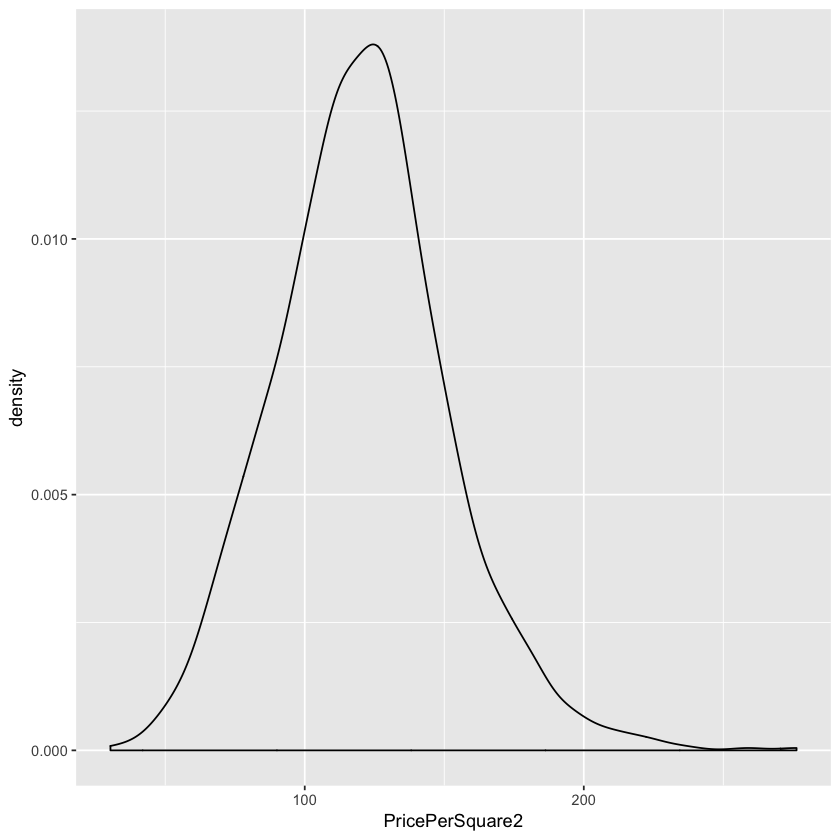

In [24]:
# *********************************** Per Square 2 using inside area. (calculation of total area see former part notebook)*************************

df$PricePerSquare2 = df$Price / df$GrLivArea

ggplot(df, aes(x = PricePerSquare2)) + 
  geom_density(trim = TRUE)

model_persquare2 <- lm(PricePerSquare2 ~ . -X -PricePerSquare1 -PriceLog - Pricebc- Price -MiscFeature -MiscVal -SalePrice -ExterQualOrigin  -ExterCondOrigin  -GarageQualOrigin  -GarageCond  -FireplaceQuOrigin  -KitchenQualOrigin  -HeatingQCOrigin  -BsmtQualOrigin -BsmtExposureOrigin -BsmtFinType1 -BsmtFinType2 -FunctionalOrigin -GarageFinishOrigin -FenceOrigin, data = df)
summary(model_persquare2)

# adjusted R square: 0.8302
# lightly skewed

yfitpsq2 <- predict(model_persquare2)

# Transform the predicted SalePrice to compare it to the simple linear model
yfitpsq2 <- yfitpsq2*df$GrLivArea
rsqpsq2 <- cor(df$Price, yfitpsq2)^2
rsqpsq2
# 0.9366


In [25]:
# **************************** CONCLUSION *************************************
# After comparing different models above, we choose to continue to work on the log model, 
# it gives the best adjusted R square with all the variables available
# and the logPrice have the most nomally distribution

In [26]:
# ***********************.   Improvements for the log model *******************************

In [27]:
# *********************** log (x) **********************
# as several variables regarding with area, are also skewed, we try to normalise them as well

df$LotFrontageLog = log(df$LotFrontage)

model_logX1 <- lm(PriceLog ~ . -X -LotFrontage -PricePerSquare2 -PricePerSquare1 - Pricebc- Price -MiscFeature -MiscVal -SalePrice -ExterQualOrigin  -ExterCondOrigin  -GarageQualOrigin  -GarageCond  -FireplaceQuOrigin  -KitchenQualOrigin  -HeatingQCOrigin  -BsmtQualOrigin -BsmtExposureOrigin -BsmtFinType1 -BsmtFinType2 -FunctionalOrigin -GarageFinishOrigin -FenceOrigin, data = df)
summary(model_logX1)
# 0.9354




Call:
lm(formula = PriceLog ~ . - X - LotFrontage - PricePerSquare2 - 
    PricePerSquare1 - Pricebc - Price - MiscFeature - MiscVal - 
    SalePrice - ExterQualOrigin - ExterCondOrigin - GarageQualOrigin - 
    GarageCond - FireplaceQuOrigin - KitchenQualOrigin - HeatingQCOrigin - 
    BsmtQualOrigin - BsmtExposureOrigin - BsmtFinType1 - BsmtFinType2 - 
    FunctionalOrigin - GarageFinishOrigin - FenceOrigin, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.66790 -0.04416  0.00079  0.04968  0.45605 

Coefficients: (5 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             8.739e+00  4.566e+00   1.914 0.055846 .  
MSSubClass             -2.035e-04  3.526e-04  -0.577 0.563925    
MSZoningFV              4.252e-01  5.240e-02   8.115 1.16e-15 ***
MSZoningRH              4.240e-01  5.240e-02   8.090 1.41e-15 ***
MSZoningRL              4.051e-01  4.445e-02   9.115  < 2e-16 ***
MSZoningRM        

In [28]:
df$LotAreaLog = log(df$LotArea)

model_logX2 <- lm(PriceLog ~ . -X -LotArea -LotFrontage -PricePerSquare2 -PricePerSquare1 - Pricebc- Price -MiscFeature -MiscVal -SalePrice -ExterQualOrigin  -ExterCondOrigin  -GarageQualOrigin  -GarageCond  -FireplaceQuOrigin  -KitchenQualOrigin  -HeatingQCOrigin  -BsmtQualOrigin -BsmtExposureOrigin -BsmtFinType1 -BsmtFinType2 -FunctionalOrigin -GarageFinishOrigin -FenceOrigin, data = df)
summary(model_logX2)
# 0,9364


Call:
lm(formula = PriceLog ~ . - X - LotArea - LotFrontage - PricePerSquare2 - 
    PricePerSquare1 - Pricebc - Price - MiscFeature - MiscVal - 
    SalePrice - ExterQualOrigin - ExterCondOrigin - GarageQualOrigin - 
    GarageCond - FireplaceQuOrigin - KitchenQualOrigin - HeatingQCOrigin - 
    BsmtQualOrigin - BsmtExposureOrigin - BsmtFinType1 - BsmtFinType2 - 
    FunctionalOrigin - GarageFinishOrigin - FenceOrigin, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.66724 -0.04495  0.00336  0.04986  0.43330 

Coefficients: (5 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             8.066e+00  4.531e+00   1.780 0.075300 .  
MSSubClass             -1.284e-04  3.496e-04  -0.367 0.713581    
MSZoningFV              4.315e-01  5.199e-02   8.299 2.71e-16 ***
MSZoningRH              4.331e-01  5.202e-02   8.327  < 2e-16 ***
MSZoningRL              4.020e-01  4.409e-02   9.119  < 2e-16 ***
MSZoning

In [29]:
# df$TotalBsmtSFLog = log(df$TotalBsmtSF)

# model_logX3 <- lm(PriceLog ~ . -TotalBsmtSF -LotArea -LotFrontage -PricePerSquare2 -PricePerSquare1 - Pricebc- Price -MiscFeature -MiscVal -SalePrice -ExterQualOrigin  -ExterCondOrigin  -GarageQualOrigin  -GarageCond  -FireplaceQuOrigin  -KitchenQualOrigin  -HeatingQCOrigin  -BsmtQualOrigin -BsmtExposureOrigin -BsmtFinType1 -BsmtFinType2 -FunctionalOrigin -GarageFinishOrigin -FenceOrigin, data = df)
# summary(model_logX3)

# it doesn't work - error message: NA/NaN/Inf in 'x'
# because TotalBsmtSF has value equals to zero, so we don't do normolisation here.

In [30]:
df$GrLivAreaLog = log(df$GrLivArea)

model_logX3 <- lm(PriceLog ~ . -X -LowQualFinSF -X1stFlrSF -X2ndFlrSF -GrLivArea -LotArea -LotFrontage -PricePerSquare2 -PricePerSquare1 - Pricebc- Price -MiscFeature -MiscVal -SalePrice -ExterQualOrigin  -ExterCondOrigin  -GarageQualOrigin  -GarageCond  -FireplaceQuOrigin  -KitchenQualOrigin  -HeatingQCOrigin  -BsmtQualOrigin -BsmtExposureOrigin -BsmtFinType1 -BsmtFinType2 -FunctionalOrigin -GarageFinishOrigin -FenceOrigin, data = df)
summary(model_logX3)
# 0.9371


Call:
lm(formula = PriceLog ~ . - X - LowQualFinSF - X1stFlrSF - X2ndFlrSF - 
    GrLivArea - LotArea - LotFrontage - PricePerSquare2 - PricePerSquare1 - 
    Pricebc - Price - MiscFeature - MiscVal - SalePrice - ExterQualOrigin - 
    ExterCondOrigin - GarageQualOrigin - GarageCond - FireplaceQuOrigin - 
    KitchenQualOrigin - HeatingQCOrigin - BsmtQualOrigin - BsmtExposureOrigin - 
    BsmtFinType1 - BsmtFinType2 - FunctionalOrigin - GarageFinishOrigin - 
    FenceOrigin, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67527 -0.04522  0.00224  0.04865  0.40708 

Coefficients: (4 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             7.752e+00  4.502e+00   1.722 0.085387 .  
MSSubClass             -2.329e-04  3.469e-04  -0.671 0.502234    
MSZoningFV              4.183e-01  5.168e-02   8.094 1.36e-15 ***
MSZoningRH              4.134e-01  5.171e-02   7.995 2.95e-15 ***
MSZoningRL        

In [31]:
model_logX4 <- lm(PriceLog ~ . -X -LowQualFinSF -GrLivArea -LotArea -LotFrontage -PricePerSquare2 -PricePerSquare1 - Pricebc- Price -MiscFeature -MiscVal -SalePrice -ExterQualOrigin  -ExterCondOrigin  -GarageQualOrigin  -GarageCond  -FireplaceQuOrigin  -KitchenQualOrigin  -HeatingQCOrigin  -BsmtQualOrigin -BsmtExposureOrigin -BsmtFinType1 -BsmtFinType2 -FunctionalOrigin -GarageFinishOrigin -FenceOrigin, data = df)
summary(model_logX4)
# 0.9377


Call:
lm(formula = PriceLog ~ . - X - LowQualFinSF - GrLivArea - LotArea - 
    LotFrontage - PricePerSquare2 - PricePerSquare1 - Pricebc - 
    Price - MiscFeature - MiscVal - SalePrice - ExterQualOrigin - 
    ExterCondOrigin - GarageQualOrigin - GarageCond - FireplaceQuOrigin - 
    KitchenQualOrigin - HeatingQCOrigin - BsmtQualOrigin - BsmtExposureOrigin - 
    BsmtFinType1 - BsmtFinType2 - FunctionalOrigin - GarageFinishOrigin - 
    FenceOrigin, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67501 -0.04450  0.00228  0.04894  0.41494 

Coefficients: (4 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             7.773e+00  4.484e+00   1.734  0.08324 .  
MSSubClass             -1.687e-04  3.463e-04  -0.487  0.62617    
MSZoningFV              4.197e-01  5.147e-02   8.154 8.57e-16 ***
MSZoningRH              4.145e-01  5.150e-02   8.048 1.95e-15 ***
MSZoningRL              3.864e-01  4.365e-

In [32]:
# df$TotalAreaLog = log(df$TotalArea)

# model_logX5 <- lm(PriceLog ~ . -TotalArea -LowQualFinSF -GrLivArea -LotArea -LotFrontage -PricePerSquare2 -PricePerSquare1 - Pricebc- Price -MiscFeature -MiscVal -SalePrice -ExterQualOrigin  -ExterCondOrigin  -GarageQualOrigin  -GarageCond  -FireplaceQuOrigin  -KitchenQualOrigin  -HeatingQCOrigin  -BsmtQualOrigin -BsmtExposureOrigin -BsmtFinType1 -BsmtFinType2 -FunctionalOrigin -GarageFinishOrigin -FenceOrigin, data = df)
# summary(model_logX5)

# doesn't improve 0.9375

In [33]:
model_logXfinal <- lm(PriceLog ~ . -X -LowQualFinSF -GrLivArea -LotArea -LotFrontage -PricePerSquare2 -PricePerSquare1 - Pricebc- Price -MiscFeature -MiscVal -SalePrice -ExterQualOrigin  -ExterCondOrigin  -GarageQualOrigin  -GarageCond  -FireplaceQuOrigin  -KitchenQualOrigin  -HeatingQCOrigin  -BsmtQualOrigin -BsmtExposureOrigin -BsmtFinType1 -BsmtFinType2 -FunctionalOrigin -GarageFinishOrigin -FenceOrigin, data = df)
summary(model_logXfinal)
# 0.9377


yfitlogXfinal <- predict(model_logXfinal)

# Transform the predicted SalePrice to compare it to the simple linear model
yfitlogXfinal <- exp(yfitlogXfinal)
rsqlogXfinal <- cor(df$Price, yfitlogXfinal)^2
rsqlogXfinal
# 0.9538



Call:
lm(formula = PriceLog ~ . - X - LowQualFinSF - GrLivArea - LotArea - 
    LotFrontage - PricePerSquare2 - PricePerSquare1 - Pricebc - 
    Price - MiscFeature - MiscVal - SalePrice - ExterQualOrigin - 
    ExterCondOrigin - GarageQualOrigin - GarageCond - FireplaceQuOrigin - 
    KitchenQualOrigin - HeatingQCOrigin - BsmtQualOrigin - BsmtExposureOrigin - 
    BsmtFinType1 - BsmtFinType2 - FunctionalOrigin - GarageFinishOrigin - 
    FenceOrigin, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67501 -0.04450  0.00228  0.04894  0.41494 

Coefficients: (4 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             7.773e+00  4.484e+00   1.734  0.08324 .  
MSSubClass             -1.687e-04  3.463e-04  -0.487  0.62617    
MSZoningFV              4.197e-01  5.147e-02   8.154 8.57e-16 ***
MSZoningRH              4.145e-01  5.150e-02   8.048 1.95e-15 ***
MSZoningRL              3.864e-01  4.365e-

[1] 0.9537707

In [34]:
# ************************ Conclusion: *****************************
# Present model: with 3 log(area) replacing the original area
# model_logX6 <- lm(PriceLog ~ . -TotalAreaLog -LowQualFinSF -GrLivArea -LotArea -LotFrontage -PricePerSquare2 -PricePerSquare1 - Pricebc- Price -MiscFeature -MiscVal -SalePrice -ExterQualOrigin  -ExterCondOrigin  -GarageQualOrigin  -GarageCond  -FireplaceQuOrigin  -KitchenQualOrigin  -HeatingQCOrigin  -BsmtQualOrigin -BsmtExposureOrigin -BsmtFinType1 -BsmtFinType2 -FunctionalOrigin -GarageFinishOrigin -FenceOrigin, data = df)
# summary(model_logX6)

In [35]:
# ************************ retain the variables that we selected ******************************
dfnew  <- subset(df, select = - c(X, LowQualFinSF, GrLivArea, LotArea, LotFrontage, PricePerSquare2, PricePerSquare1, Pricebc, Price, MiscFeature, MiscVal, SalePrice, ExterQualOrigin, ExterCondOrigin, GarageQualOrigin, GarageCond, FireplaceQuOrigin, KitchenQualOrigin, HeatingQCOrigin, BsmtQualOrigin, BsmtExposureOrigin, BsmtFinType1, BsmtFinType2, FunctionalOrigin, GarageFinishOrigin, FenceOrigin) )
str(dfnew)


'data.frame':	1456 obs. of  79 variables:
 $ MSSubClass        : int  60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning          : Factor w/ 5 levels "C (all)","FV",..: 4 4 4 4 4 4 4 4 5 4 ...
 $ Street            : Factor w/ 2 levels "Grvl","Pave": 2 2 2 2 2 2 2 2 2 2 ...
 $ Alley             : Factor w/ 3 levels "Grvl","None",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ LotShape          : Factor w/ 4 levels "IR1","IR2","IR3",..: 4 4 1 1 1 1 4 1 4 4 ...
 $ LandContour       : Factor w/ 4 levels "Bnk","HLS","Low",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ LotConfig         : Factor w/ 5 levels "Corner","CulDSac",..: 5 3 5 1 3 5 5 1 5 1 ...
 $ LandSlope         : Factor w/ 3 levels "Gtl","Mod","Sev": 1 1 1 1 1 1 1 1 1 1 ...
 $ Neighborhood      : Factor w/ 25 levels "Blmngtn","Blueste",..: 6 25 6 7 14 12 21 17 18 4 ...
 $ Condition1        : Factor w/ 9 levels "Artery","Feedr",..: 3 2 3 3 3 3 3 5 1 1 ...
 $ Condition2        : Factor w/ 8 levels "Artery","Feedr",..: 3 3 3 3 3 3 3 3 3 1 ...
 $ BldgType          : F

In [41]:
#forward stepwise#
null=lm(PriceLog~1, data=dfnew, x = TRUE, y = TRUE)
full=lm(PriceLog~ ., data=dfnew, x =TRUE, y = TRUE) 

In [42]:
#Set the random seed
set.seed(1234)
#FORWARD selection
lm.for <- step(null, scope=list(lower=null, upper=full), direction="forward")
summary(lm.for)
# 0.9370

yfitlogforward <- predict(lm.for)
# Transform the predicted SalePrice to compare it to the simple linear model
yfitlogforward <- exp(yfitlogforward)
rsqlogforward <- cor(df$Price, yfitlogforward)^2
rsqlogforward
# 0.9489

#AIC estimates the relative information lost by a given model: 
#the less information a model loses, the higher the quality of that model

Start:  AIC=-2694.31
PriceLog ~ 1

                     Df Sum of Sq     RSS     AIC
+ OverallQual         1   153.365  75.147 -4311.6
+ Neighborhood       24   130.315  98.197 -3876.1
+ GrLivAreaLog        1   122.678 105.834 -3813.0
+ ExterQual           1   106.028 122.484 -3600.3
+ GarageCars          1   105.851 122.661 -3598.2
+ KitchenQual         1   101.809 126.704 -3551.0
+ GarageArea          1    98.115 130.397 -3509.1
+ TotalBsmtSF         1    94.080 134.432 -3464.8
+ BsmtQual            1    86.609 141.903 -3386.0
+ X1stFlrSF           1    86.095 142.417 -3380.7
+ FullBath            1    79.755 148.757 -3317.3
+ YearBuilt           1    79.301 149.211 -3312.9
+ GarageType          6    77.243 151.269 -3282.9
+ GarageYrBlt         1    74.597 153.915 -3267.7
+ YearRemodAdd        1    73.965 154.548 -3261.7
+ Foundation          5    69.635 158.877 -3213.5
+ FireplaceQu         1    68.275 160.237 -3209.1
+ TotRmsAbvGrd        1    64.936 163.576 -3179.1
+ GarageFinish 


Call:
lm(formula = PriceLog ~ OverallQual + GrLivAreaLog + Neighborhood + 
    BsmtFinSF1 + OverallCond + YearBuilt + LotAreaLog + TotalBsmtSF + 
    GarageCars + SaleCondition + MSZoning + KitchenAbvGr + Functional + 
    KitchenQual + Condition1 + Exterior1st + BsmtExposure + HeatingQC + 
    ScreenPorch + BsmtFullBath + Foundation + WoodDeckSF + Fireplaces + 
    SaleType + CentralAir + OpenPorchSF + Street + YearRemodAdd + 
    X2ndFlrSF + X1stFlrSF + GarageQual + GarageCondOrigin + Heating + 
    LotConfig + MasVnrType + BsmtFinSF2 + Season + PoolQC + MSSubClass + 
    HalfBath + GarageArea + BsmtQual + LandSlope + PavedDrive + 
    EnclosedPorch + MasVnrArea + X3SsnPorch + PoolArea + FullBath, 
    data = dfnew, x = TRUE, y = TRUE)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.66302 -0.04639  0.00208  0.05252  0.43270 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.813e+00  8.276e-01   2.190 0.028663 *  
Over

[1] 0.9489233

In [38]:
#backward stepwise

In [43]:
#set the random seed
set.seed(1234)
#BACKWARD selection
lm.back <- step(full, scope=list(lower=null, upper=full), direction="backward")
summary(lm.back)
#0.9369

yfitlogbackward <- predict(lm.back)
# Transform the predicted SalePrice to compare it to the simple linear model
yfitlogbackward <- exp(yfitlogbackward)
rsqlogbackward <- cor(df$Price, yfitlogbackward)^2
rsqlogbackward
# 0.9489

#AIC estimates the relative information lost by a given model: 
#the less information a model loses, the higher the quality of that model

Start:  AIC=-6537.16
PriceLog ~ MSSubClass + MSZoning + Street + Alley + LotShape + 
    LandContour + LotConfig + LandSlope + Neighborhood + Condition1 + 
    Condition2 + BldgType + HouseStyle + OverallQual + OverallCond + 
    YearBuilt + YearRemodAdd + RoofStyle + RoofMatl + Exterior1st + 
    Exterior2nd + MasVnrType + MasVnrArea + ExterQual + ExterCond + 
    Foundation + BsmtQual + BsmtCond + BsmtExposure + BsmtFinSF1 + 
    BsmtFinSF2 + BsmtUnfSF + TotalBsmtSF + Heating + HeatingQC + 
    CentralAir + Electrical + X1stFlrSF + X2ndFlrSF + BsmtFullBath + 
    BsmtHalfBath + FullBath + HalfBath + BedroomAbvGr + KitchenAbvGr + 
    KitchenQual + TotRmsAbvGrd + Functional + Fireplaces + FireplaceQu + 
    GarageType + GarageYrBlt + GarageFinish + GarageCars + GarageArea + 
    GarageQual + PavedDrive + WoodDeckSF + OpenPorchSF + EnclosedPorch + 
    X3SsnPorch + ScreenPorch + PoolArea + PoolQC + Fence + MoSold + 
    YrSold + SaleType + SaleCondition + GarageCondOrigin + BsmtFinType


Call:
lm(formula = PriceLog ~ MSZoning + Street + LotConfig + LandSlope + 
    Neighborhood + Condition1 + OverallQual + OverallCond + YearBuilt + 
    YearRemodAdd + Exterior1st + MasVnrType + MasVnrArea + Foundation + 
    BsmtExposure + BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF + Heating + 
    HeatingQC + CentralAir + X1stFlrSF + X2ndFlrSF + BsmtFullBath + 
    FullBath + HalfBath + BedroomAbvGr + KitchenAbvGr + KitchenQual + 
    TotRmsAbvGrd + Functional + Fireplaces + GarageCars + GarageArea + 
    GarageQual + PavedDrive + WoodDeckSF + OpenPorchSF + EnclosedPorch + 
    ScreenPorch + PoolArea + PoolQC + SaleType + SaleCondition + 
    GarageCondOrigin + Season + LotAreaLog + GrLivAreaLog, data = dfnew, 
    x = TRUE, y = TRUE)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.66664 -0.04690  0.00153  0.05371  0.44028 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.461e+00  8.194e-01   1.783 0.074811 .  
MSZoningFV   

[1] 0.9489354

In [44]:
#-----------------------   Cross Validation   ----------------------------
# This method can be used to compare different model predicting the same output

library(lmvar)

# k is the number of folds, setting seed let's you have reproductible results

Cross_Validation = cv.lm(lm.for, k = 10, seed = 10)
Cross_Validation

Mean absolute error        :  0.07614824 
Sample standard deviation  :  0.005260088 

Mean squared error         :  0.01222442 
Sample standard deviation  :  0.002541517 

Root mean squared error    :  0.1100413 
Sample standard deviation  :  0.01132047 


In [45]:
Cross_Validation = cv.lm(lm.back, k = 10, seed = 10)
Cross_Validation

Mean absolute error        :  0.07641784 
Sample standard deviation  :  0.005369082 

Mean squared error         :  0.01229487 
Sample standard deviation  :  0.002759005 

Root mean squared error    :  0.1102841 
Sample standard deviation  :  0.01212346 
